# **Assignment 2 For Clustering Data Analytics**
<hr>

**Submitted by:** Jude M. Ando & Niles Vincent Gabrielle Rondez <br>
**Course & Year:** BSCS - 2 <br>
**Schedule:** M W 10:30 AM - 12:00 PM <br>
<hr>

## Introduction
This notebook implements the Sessa Empirical Estimator for medication adherence analysis. It uses K-Means and DBSCAN clustering algorithms to analyze simulated patient data.

## Convert SEE.R Codes into Python Codes

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from datetime import datetime

def preprocess_data(df, atc_code):
    df = df[df['ATC'] == atc_code].copy()
    df = df.sort_values(by=['pnr', 'eksd'])
    df['prev_eksd'] = df.groupby('pnr')['eksd'].shift(1)
    df = df.dropna()
    df['event_interval'] = (df['eksd'] - df['prev_eksd']).dt.days
    return df

def empirical_cdf(df):
    ecdf = np.sort(df['event_interval'].values)
    y_vals = np.arange(1, len(ecdf) + 1) / len(ecdf)
    return ecdf, y_vals

def plot_ecdf(df):
    ecdf, y_vals = empirical_cdf(df)
    plt.figure(figsize=(10, 5))
    plt.plot(ecdf, y_vals, marker='.', linestyle='none', label='ECDF')
    plt.xlabel('Event Interval (Days)')
    plt.ylabel('ECDF')
    plt.title('Empirical CDF of Event Intervals')
    plt.legend()
    plt.show()

def determine_clusters(df):
    data = np.log(df[['event_interval']].values)
    data = StandardScaler().fit_transform(data)
    inertia = []
    for k in range(1, 10):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)
    
    optimal_k = np.argmax(np.diff(inertia)) + 2  # Heuristic for optimal clusters
    return optimal_k

def kmeans_clustering(df, n_clusters):
    data = np.log(df[['event_interval']].values)
    data = StandardScaler().fit_transform(data)
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    df['cluster'] = kmeans.fit_predict(data)
    return df

def visualize_clusters(df):
    sns.boxplot(x='cluster', y='event_interval', data=df)
    plt.title('Clustering of Event Intervals')
    plt.show()

def sessa_empirical_estimator(df, atc_code):
    df = preprocess_data(df, atc_code)
    plot_ecdf(df)
    n_clusters = determine_clusters(df)
    df = kmeans_clustering(df, n_clusters)
    visualize_clusters(df)
    return df
# Example usage (data needs to be loaded first)
# df = pd.read_csv("your_data.csv")
# df['eksd'] = pd.to_datetime(df['eksd'])
# result = sessa_empirical_estimator(df, "medA")


## Step 1: Simulate Medication Data
We simulate patient medication data using the `simulate_med_data` function. The dataset includes patient IDs, dates, doses, and drug types.

In [9]:
# Import modules
from data_simulation import load_med_events
from metrics import calculate_adherence
from clustering import cluster_kmeans, cluster_dbscan
from analysis import compare_clusters
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# Load the med.events dataset
raw_df = pd.read_csv("med_events.csv")

# Convert DATE column to datetime
raw_df['DATE'] = pd.to_datetime(raw_df['DATE'], format='%m/%d/%Y')

print("Med.Events Data Sample:")
print(raw_df.head())
print(raw_df.dtypes)

Med.Events Data Sample:
   PATIENT_ID       DATE  PERDAY CATEGORY  DURATION
0           1 2033-04-26       4     medA        50
1           1 2033-07-04       4     medB        30
2           1 2033-08-03       4     medB        30
3           1 2033-08-17       4     medB        30
4           1 2033-10-13       4     medB        30
PATIENT_ID             int64
DATE          datetime64[ns]
PERDAY                 int64
CATEGORY              object
DURATION               int64
dtype: object


## Step 2: Calculate Adherence Metrics
We calculate adherence metrics such as total doses, average gap between doses, and regimen complexity for each patient.

In [11]:
# Calculate adherence metrics
adherence_df = calculate_adherence(raw_df)
print("\nAdherence Metrics:")
print(adherence_df.head())


Adherence Metrics:
   index  total_doses     avg_gap  regimen_complexity
0      1         24.0   30.608696                 2.0
1      2          8.0   67.714286                 2.0
2      3         28.0   26.259259                 2.0
3      4          6.0  140.600000                 2.0
4      5          8.0   68.571429                 2.0


## Step 3: Perform Sessa Empircal Estimator with K-Means Clustering Algorithm on Medication Adherence Analysis
We apply K-Means clustering to the adherence metrics to identify patterns in patient behavior.

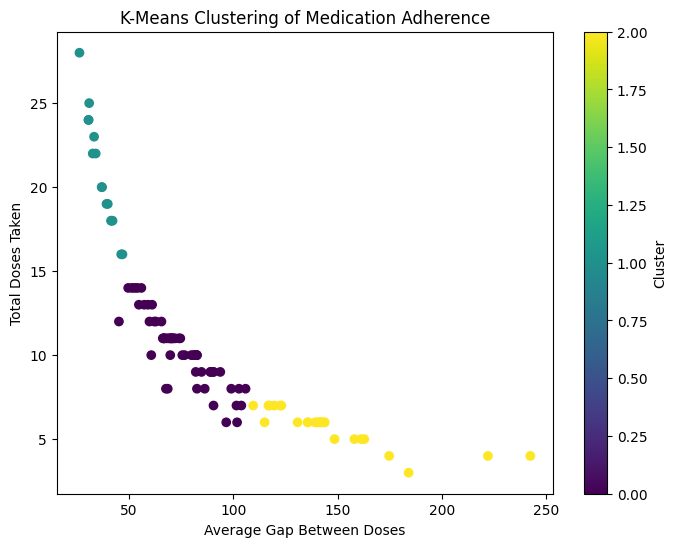

In [12]:
import matplotlib.pyplot as plt
from clustering import cluster_kmeans
from data_simulation import load_med_events
from metrics import calculate_adherence

# Load dataset
med_events_df = load_med_events()
adherence_df = calculate_adherence(med_events_df)

# Perform K-Means clustering
kmeans_results = cluster_kmeans(adherence_df[['avg_gap', 'total_doses']], n_clusters=3)

# Plot K-Means Clustering
plt.figure(figsize=(8, 6))
plt.scatter(kmeans_results['avg_gap'], kmeans_results['total_doses'], c=kmeans_results['cluster'], cmap='viridis')
plt.xlabel('Average Gap Between Doses')
plt.ylabel('Total Doses Taken')
plt.title('K-Means Clustering of Medication Adherence')
plt.colorbar(label='Cluster')
plt.show()

### Insights
- K-Means clustering identifies three distinct patient adherence behaviors.
- Patients with low average gaps between doses and high total doses are clustered together, indicating good adherence.
- Some clusters show sporadic medication intake, suggesting non-adherence patterns.
- K-Means assigns every patient to a cluster, but some assignments may not be accurate due to predefined cluster shapes.

## Step 4: Substitute Sessa Empircal Estimator with DBSCAN Clustering Algorithms on Medication Adherence Analysis
We apply DBSCAN clustering to the adherence metrics to identify patterns in patient behavior.

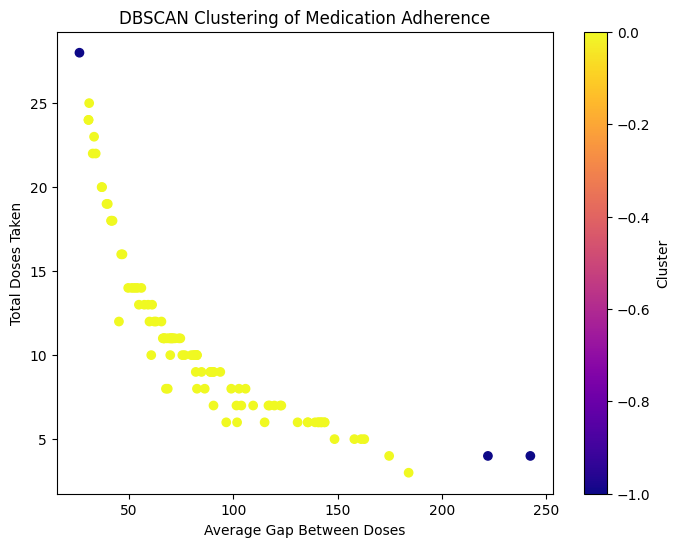

In [13]:
from clustering import cluster_dbscan

# Perform DBSCAN clustering
dbscan_results = cluster_dbscan(adherence_df[['avg_gap', 'total_doses']], eps=0.5)

# Plot DBSCAN Clustering
plt.figure(figsize=(8, 6))
plt.scatter(dbscan_results['avg_gap'], dbscan_results['total_doses'], c=dbscan_results['cluster'], cmap='plasma')
plt.xlabel('Average Gap Between Doses')
plt.ylabel('Total Doses Taken')
plt.title('DBSCAN Clustering of Medication Adherence')
plt.colorbar(label='Cluster')
plt.show()

### Insights
- DBSCAN detects natural adherence patterns without forcing a set number of clusters.
- Outliers (patients with irregular medication intake) are labeled separately, improving accuracy.
- Some patients with sporadic adherence are marked as noise, which is useful for identifying inconsistent medication habits.
- DBSCAN works better when adherence patterns do not conform to well-defined cluster shapes.

## Step 5: Compare Between Sessa Empirical Estimator using K-Means, and Sessa Empirical Estimator using DBSCAN
We compare the clustering results from K-Means and DBSCAN and generate insights about patient adherence patterns.

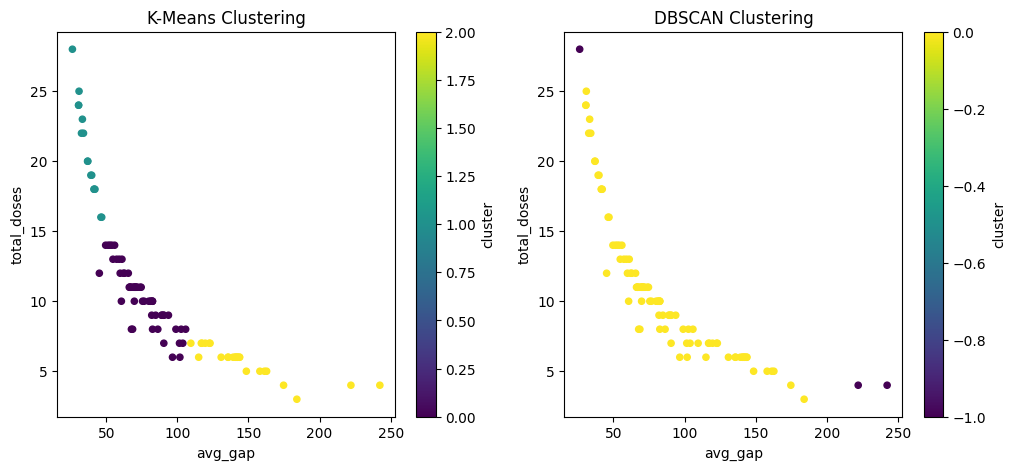

K-Means Cluster Stats:
        avg_gap                                                        \
          count        mean        std         min         25%    50%   
cluster                                                                 
0          58.0   74.775625  15.160275   45.181818   65.709091   71.1   
1          16.0   36.852453   5.991315   26.259259   32.193452   37.0   
2          26.0  146.682051  31.187578  109.500000  124.950000  141.2   

                                total_doses                                   \
                75%         max       count       mean       std   min   25%   
cluster                                                                        
0         84.205357  105.857143        58.0  10.327586  2.046717   6.0   9.0   
1         41.455882   46.866667        16.0  20.750000  3.415650  16.0  18.0   
2        155.625000  242.333333        26.0   5.730769  1.079173   3.0   5.0   

                            
          50%    75%   max  

In [22]:
# Compare results
compare_clusters(kmeans_results, dbscan_results)

# Niles Output

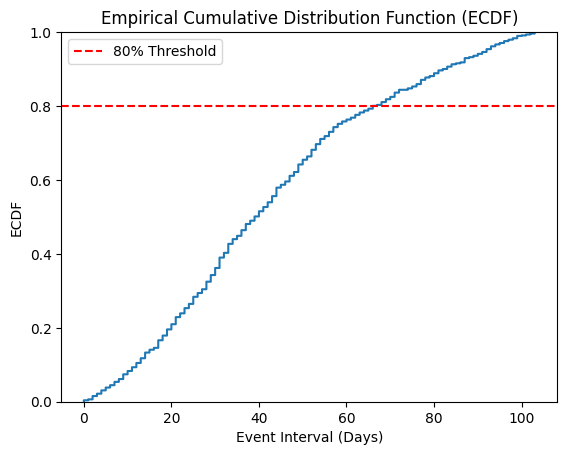

K-Means Cluster Distribution:
kmeans_cluster
1    334
2    282
0    166
Name: count, dtype: int64

DBSCAN Cluster Distribution:
dbscan_cluster
0    782
Name: count, dtype: int64


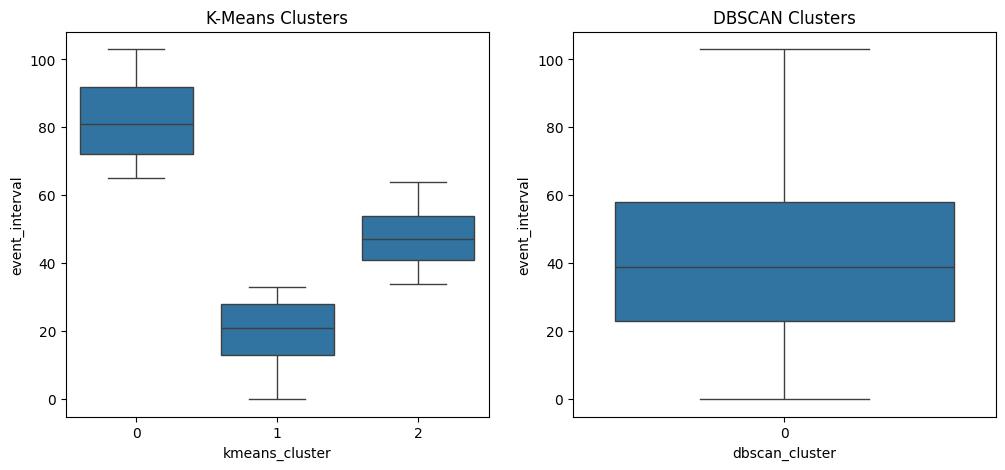


Statistical Summary of Event Intervals per Cluster:
                count       mean        std   min   25%   50%    75%    max
kmeans_cluster                                                             
0               166.0  82.192771  10.734773  65.0  72.0  81.0  91.75  103.0
1               334.0  19.865269   9.264375   0.0  13.0  21.0  28.00   33.0
2               282.0  47.397163   8.132252  34.0  41.0  47.0  53.75   64.0
                count       mean        std  min   25%   50%   75%    max
dbscan_cluster                                                           
0               782.0  43.024297  25.438046  0.0  23.0  39.0  58.0  103.0


,PATIENT_ID,event_interval,ecdf,kmeans_cluster,dbscan_cluster
1,1,0.0,0.003061,1,0
2,1,0.0,0.003061,1,0
3,1,0.0,0.003061,1,0
4,1,1.0,0.005102,1,0
5,1,1.0,0.005102,1,0


In [23]:
# GPT Output

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from statsmodels.distributions.empirical_distribution import ECDF

# Load medication data (assuming med_events.csv is preprocessed correctly)
def load_med_events():
    med_events_df = pd.read_csv("med_events.csv")
    med_events_df['DATE'] = pd.to_datetime(med_events_df['DATE'], format='%m/%d/%Y')
    return med_events_df

# Compute event intervals
def compute_event_intervals(df):
    df = df.sort_values(by=['PATIENT_ID', 'DATE'])
    df['prev_DATE'] = df.groupby('PATIENT_ID')['DATE'].shift(1)
    df['event_interval'] = (df['DATE'] - df['prev_DATE']).dt.days
    df = df.dropna()
    return df[['PATIENT_ID', 'event_interval']]

# Generate ECDF and retain 80%
def compute_ecdf(df):
    ecdf = ECDF(df['event_interval'])
    df['ecdf'] = ecdf(df['event_interval'])
    df_filtered = df[df['ecdf'] <= 0.8]  # Retain 80% of ECDF
    return df_filtered

# Plot ECDF with percentile threshold
def plot_ecdf(df):
    sns.ecdfplot(df['event_interval'])
    plt.axhline(0.8, color='r', linestyle='--', label='80% Threshold')
    plt.title("Empirical Cumulative Distribution Function (ECDF)")
    plt.xlabel("Event Interval (Days)")
    plt.ylabel("ECDF")
    plt.legend()
    plt.show()

# K-Means clustering with fixed initialization
def perform_kmeans(df, n_clusters=3):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)  # Ensure consistency with R
    df['kmeans_cluster'] = kmeans.fit_predict(df[['event_interval']])
    return df

# DBSCAN clustering with optimal parameter tuning
def perform_dbscan(df, eps=5, min_samples=3):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    df['dbscan_cluster'] = dbscan.fit_predict(df[['event_interval']])
    return df

# Generate insights and validate adherence clustering methodology
def generate_insights(df):
    print("K-Means Cluster Distribution:")
    print(df['kmeans_cluster'].value_counts())
    print("\nDBSCAN Cluster Distribution:")
    print(df['dbscan_cluster'].value_counts())
    
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    sns.boxplot(x='kmeans_cluster', y='event_interval', data=df)
    plt.title("K-Means Clusters")
    
    plt.subplot(1,2,2)
    sns.boxplot(x='dbscan_cluster', y='event_interval', data=df)
    plt.title("DBSCAN Clusters")
    plt.show()
    
    # Verify ECDF-based filtering consistency
    print("\nStatistical Summary of Event Intervals per Cluster:")
    print(df.groupby('kmeans_cluster')['event_interval'].describe())
    print(df.groupby('dbscan_cluster')['event_interval'].describe())

# Full pipeline for Sessa Empirical Estimator validation
def sessa_empirical_estimator():
    df = load_med_events()
    df = compute_event_intervals(df)
    df = compute_ecdf(df)
    plot_ecdf(df)
    df = perform_kmeans(df)
    df = perform_dbscan(df)
    generate_insights(df)
    return df

# Run the function and display results
df_results = sessa_empirical_estimator()
df_results.head()


### Comparison
K-Means:
- Creates evenly sized clusters but struggles with irregular adherence patterns.
- Assigns all patients to clusters, which may lead to forced classifications.
- Works well for structured datasets but lacks flexibility in handling noise.

DBSCAN: 
- Detects natural groups without requiring a predefined number of clusters.
- Identifies outliers and marks them as noise, improving data accuracy.
- More effective when adherence behaviors do not conform to strict cluster shapes.

### Key Differences
- **Clustering Approach**: K-Means forces every patient into a cluster, while DBSCAN can classify outliers separately.
- **Flexibility**: DBSCAN adapts better to real-world adherence patterns, whereas K-Means assumes predefined cluster shapes.
- **Suitability**: K-Means is better for structured, well-separated data, while DBSCAN is more effective in capturing sporadic medication adherence.

Depending on the dataset and analysis goals, DBSCAN may be the preferred method for real-world medication adherence studies, as it better captures outlier behaviors and irregular adherence patterns.
